In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('./Data/homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
df.sample(10)

,area,bedrooms,price
5,1170,2,38.00
6,2732,4,135.00
16,1180,3,48.00
11,2785,4,140.00
1,2600,4,120.00
0,1056,2,39.07
7,3300,4,155.00
12,1000,2,38.00
4,1200,2,51.00
8,1310,3,50.00


In [4]:
from sklearn import preprocessing

In [5]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

X_scaled = sx.fit_transform(df.drop(columns=['price'],axis='columns'))
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [15]:
def bach_gradient_descent(x,y_true,epochs,learning_rate = 0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    number_of_sample = x.shape[0]
    cost_list=[]
    epochs_list =[]
    for i in range(epochs):
        y_predicted = np.dot(w,X_scaled.T) + b
        w_grad = -(2/number_of_sample) * (x.T.dot(y_true-y_predicted))
        b_grad = -(2/number_of_sample) * (np.sum(y_true-y_predicted))
        w =w - learning_rate * w_grad
        b =b - learning_rate * b_grad
        cost =np.mean(np.square( y_true-y_predicted ))
        if i%10 == 0:
            cost_list.append(cost)
            epochs_list.append(i)
    return w,b,cost,cost_list,epochs_list
    

In [16]:
w,b,cost,cost_list,epochs_list = bach_gradient_descent(X_scaled,y_scaled.reshape(y_scaled.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

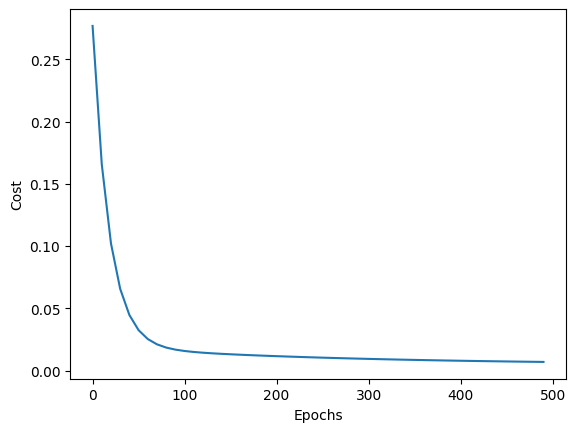

In [17]:
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(epochs_list,cost_list)

In [24]:
def predict(a,b,w,bias):
    scaled_value = sx.transform([[a,b]])[0]
    scaled_price = w[0] * scaled_value[0] + w[1] * scaled_value[1] + bias
    return sy.inverse_transform([[scaled_price]])[0][0]

In [25]:
predict(2600,4,w,b)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

Stochasitc Descent

In [52]:
def stochasitc_gradient_descent(x,y_true,epochs,learning_rate = 0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    number_of_sample = x.shape[0]
    cost_list=[]
    epochs_list =[]
    for i in range(epochs):
        random_index= random.randint(0,number_of_sample-1)
        sample_X = x[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w,sample_X.T) + b
        w_grad = -(2/number_of_sample) * (sample_X.T.dot(sample_y-y_predicted))
        b_grad = -(2/number_of_sample) * (np.sum(sample_y-y_predicted))
        w =w - learning_rate * w_grad
        b =b - learning_rate * b_grad
        cost =np.mean(np.square( sample_y-y_predicted ))
        if i%100 == 0:
            cost_list.append(cost)
            epochs_list.append(i)
    return w,b,cost,cost_list,epochs_list

In [53]:
w_s,b_s,cost_s,cost_list_s,epochs_list_s = stochasitc_gradient_descent(X_scaled,y_scaled.reshape(y_scaled.shape[0],),10000)
w_s,b_s,cost_s

(array([0.70447853, 0.67362651]), -0.23203905395253674, 0.0014935967869672518)

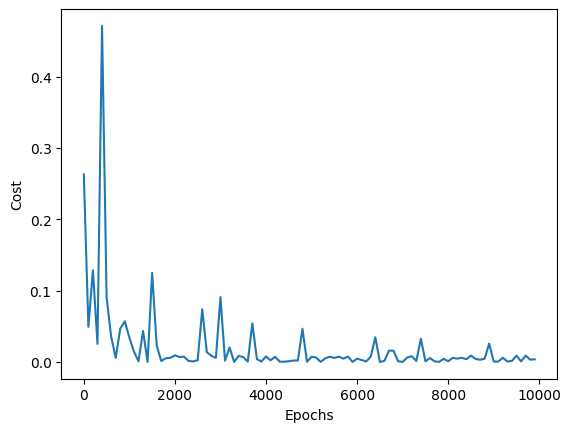

In [54]:
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(epochs_list_s,cost_list_s)

In [55]:
predict(2600,4,w_s,b_s)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


127.9098535349315